In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix
from pandas_visual_analysis import VisualAnalysis

In [2]:
Data=pd.read_csv(r"C:\Users\Avi Chaudhary\Desktop\Machine learning (Data)\2020-2023(sanjay nagar).csv")
Data

,From Date,To Date,PM2.5,PM10,NO2,NO,NOx,NH3,SO2,CO,...,Eth-Benzene,WS,WD,AT,RH,BP,SR,TOT-RF,RF,Temp
0,01-01-2020 00:00,02-01-2020 00:00,0.00,446.60,65.74,103.47,119.14,70.18,8.33,3.20,...,NaN,1.05,223.89,11.38,77.17,740.95,52.12,NaN,1,30.86
1,02-01-2020 00:00,03-01-2020 00:00,0.00,366.34,70.28,105.24,122.96,69.40,13.20,2.74,...,NaN,0.89,182.75,14.55,73.59,741.07,52.52,NaN,None,31.35
2,03-01-2020 00:00,04-01-2020 00:00,178.18,297.20,65.28,117.06,131.81,67.61,12.66,2.50,...,NaN,0.94,198.12,15.96,74.03,741.21,55.92,NaN,None,31.6
3,04-01-2020 00:00,05-01-2020 00:00,248.89,319.67,69.16,65.91,90.40,73.12,4.52,1.85,...,NaN,1.32,127.3,15.39,72.72,740.96,43.54,NaN,None,32.03
4,05-01-2020 00:00,06-01-2020 00:00,223.05,285.81,65.40,14.28,46.45,67.12,15.71,1.26,...,NaN,1.97,117.35,15.27,64.61,740.94,46.79,NaN,None,31.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,01-01-2023 00:00,02-01-2023 00:00,108.57,176.71,90.34,33.22,75.07,43.25,15.73,1.13,...,NaN,0.94,211.77,21.22,77.26,738.32,62.27,NaN,None,29.97
1097,02-01-2023 00:00,03-01-2023 00:00,125.62,190.38,75.31,13.87,51.34,50.06,9.10,0.92,...,NaN,0.95,244.41,20.27,82.1,738.23,48.78,NaN,None,29.99
1098,03-01-2023 00:00,04-01-2023 00:00,161.88,236.82,71.89,13.83,49.48,45.02,59.33,0.77,...,NaN,1.08,212.71,19.66,81.17,738.23,40.39,NaN,None,29.81
1099,04-01-2023 00:00,05-01-2023 00:00,118.05,286.43,84.35,42.03,79.03,41.62,21.74,1.09,...,NaN,1.31,209.56,17.86,84.34,738.02,43.23,NaN,None,28.99


In [3]:
Data.drop([0],axis=0,inplace=True)

In [4]:
Data

,From Date,To Date,PM2.5,PM10,NO2,NO,NOx,NH3,SO2,CO,...,Eth-Benzene,WS,WD,AT,RH,BP,SR,TOT-RF,RF,Temp
1,02-01-2020 00:00,03-01-2020 00:00,0.00,366.34,70.28,105.24,122.96,69.40,13.20,2.74,...,NaN,0.89,182.75,14.55,73.59,741.07,52.52,NaN,None,31.35
2,03-01-2020 00:00,04-01-2020 00:00,178.18,297.20,65.28,117.06,131.81,67.61,12.66,2.50,...,NaN,0.94,198.12,15.96,74.03,741.21,55.92,NaN,None,31.6
3,04-01-2020 00:00,05-01-2020 00:00,248.89,319.67,69.16,65.91,90.40,73.12,4.52,1.85,...,NaN,1.32,127.3,15.39,72.72,740.96,43.54,NaN,None,32.03
4,05-01-2020 00:00,06-01-2020 00:00,223.05,285.81,65.40,14.28,46.45,67.12,15.71,1.26,...,NaN,1.97,117.35,15.27,64.61,740.94,46.79,NaN,None,31.86
5,06-01-2020 00:00,07-01-2020 00:00,189.55,254.32,64.46,30.66,58.53,72.07,20.92,1.48,...,NaN,1.57,152.08,14.65,72.73,741.09,24.21,NaN,1,31.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,01-01-2023 00:00,02-01-2023 00:00,108.57,176.71,90.34,33.22,75.07,43.25,15.73,1.13,...,NaN,0.94,211.77,21.22,77.26,738.32,62.27,NaN,None,29.97
1097,02-01-2023 00:00,03-01-2023 00:00,125.62,190.38,75.31,13.87,51.34,50.06,9.10,0.92,...,NaN,0.95,244.41,20.27,82.1,738.23,48.78,NaN,None,29.99
1098,03-01-2023 00:00,04-01-2023 00:00,161.88,236.82,71.89,13.83,49.48,45.02,59.33,0.77,...,NaN,1.08,212.71,19.66,81.17,738.23,40.39,NaN,None,29.81
1099,04-01-2023 00:00,05-01-2023 00:00,118.05,286.43,84.35,42.03,79.03,41.62,21.74,1.09,...,NaN,1.31,209.56,17.86,84.34,738.02,43.23,NaN,None,28.99


In [5]:
Data.head()

,From Date,To Date,PM2.5,PM10,NO2,NO,NOx,NH3,SO2,CO,...,Eth-Benzene,WS,WD,AT,RH,BP,SR,TOT-RF,RF,Temp
1,02-01-2020 00:00,03-01-2020 00:00,0.00,366.34,70.28,105.24,122.96,69.40,13.20,2.74,...,NaN,0.89,182.75,14.55,73.59,741.07,52.52,NaN,None,31.35
2,03-01-2020 00:00,04-01-2020 00:00,178.18,297.20,65.28,117.06,131.81,67.61,12.66,2.50,...,NaN,0.94,198.12,15.96,74.03,741.21,55.92,NaN,None,31.6
3,04-01-2020 00:00,05-01-2020 00:00,248.89,319.67,69.16,65.91,90.40,73.12,4.52,1.85,...,NaN,1.32,127.3,15.39,72.72,740.96,43.54,NaN,None,32.03
4,05-01-2020 00:00,06-01-2020 00:00,223.05,285.81,65.40,14.28,46.45,67.12,15.71,1.26,...,NaN,1.97,117.35,15.27,64.61,740.94,46.79,NaN,None,31.86
5,06-01-2020 00:00,07-01-2020 00:00,189.55,254.32,64.46,30.66,58.53,72.07,20.92,1.48,...,NaN,1.57,152.08,14.65,72.73,741.09,24.21,NaN,1,31.98


In [6]:
Data.isnull().sum()

From Date         0
To Date           0
PM2.5             0
PM10              0
NO2               0
NO                0
NOx               0
NH3               0
SO2               0
CO                0
Ozone             0
Benzene           0
Toluene           0
Xylene         1100
MP-Xylene      1100
Eth-Benzene    1100
WS                0
WD                0
AT                0
RH                0
BP                0
SR                0
TOT-RF         1100
RF                0
Temp              0
dtype: int64

In [7]:
Data.shape

(1100, 25)

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 1 to 1100
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   From Date    1100 non-null   object 
 1   To Date      1100 non-null   object 
 2   PM2.5        1100 non-null   float64
 3   PM10         1100 non-null   float64
 4   NO2          1100 non-null   float64
 5   NO           1100 non-null   float64
 6   NOx          1100 non-null   float64
 7   NH3          1100 non-null   float64
 8   SO2          1100 non-null   float64
 9   CO           1100 non-null   float64
 10  Ozone        1100 non-null   float64
 11  Benzene      1100 non-null   object 
 12  Toluene      1100 non-null   object 
 13  Xylene       0 non-null      float64
 14  MP-Xylene    0 non-null      float64
 15  Eth-Benzene  0 non-null      float64
 16  WS           1100 non-null   object 
 17  WD           1100 non-null   object 
 18  AT           1100 non-null   object 
 19  RH    

In [9]:
Data.columns

Index(['From Date', 'To Date', 'PM2.5', 'PM10', 'NO2', 'NO', 'NOx', 'NH3',
       'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'Xylene', 'MP-Xylene',
       'Eth-Benzene', 'WS', 'WD', 'AT', 'RH', 'BP', 'SR', 'TOT-RF', 'RF',
       'Temp'],
      dtype='object')

In [10]:
Data.dtypes

From Date       object
To Date         object
PM2.5          float64
PM10           float64
NO2            float64
NO             float64
NOx            float64
NH3            float64
SO2            float64
CO             float64
Ozone          float64
Benzene         object
Toluene         object
Xylene         float64
MP-Xylene      float64
Eth-Benzene    float64
WS              object
WD              object
AT              object
RH              object
BP              object
SR              object
TOT-RF         float64
RF              object
Temp            object
dtype: object

In [11]:
Data.drop(['Xylene','MP-Xylene','Eth-Benzene','TOT-RF'],inplace=True,axis=1)

In [12]:
Data

,From Date,To Date,PM2.5,PM10,NO2,NO,NOx,NH3,SO2,CO,...,Benzene,Toluene,WS,WD,AT,RH,BP,SR,RF,Temp
1,02-01-2020 00:00,03-01-2020 00:00,0.00,366.34,70.28,105.24,122.96,69.40,13.20,2.74,...,1.61,8.94,0.89,182.75,14.55,73.59,741.07,52.52,None,31.35
2,03-01-2020 00:00,04-01-2020 00:00,178.18,297.20,65.28,117.06,131.81,67.61,12.66,2.50,...,1.33,9.17,0.94,198.12,15.96,74.03,741.21,55.92,None,31.6
3,04-01-2020 00:00,05-01-2020 00:00,248.89,319.67,69.16,65.91,90.40,73.12,4.52,1.85,...,1.26,11.76,1.32,127.3,15.39,72.72,740.96,43.54,None,32.03
4,05-01-2020 00:00,06-01-2020 00:00,223.05,285.81,65.40,14.28,46.45,67.12,15.71,1.26,...,0.8,5.79,1.97,117.35,15.27,64.61,740.94,46.79,None,31.86
5,06-01-2020 00:00,07-01-2020 00:00,189.55,254.32,64.46,30.66,58.53,72.07,20.92,1.48,...,0.82,6.65,1.57,152.08,14.65,72.73,741.09,24.21,1,31.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,01-01-2023 00:00,02-01-2023 00:00,108.57,176.71,90.34,33.22,75.07,43.25,15.73,1.13,...,0.33,4.23,0.94,211.77,21.22,77.26,738.32,62.27,None,29.97
1097,02-01-2023 00:00,03-01-2023 00:00,125.62,190.38,75.31,13.87,51.34,50.06,9.10,0.92,...,0.28,2.17,0.95,244.41,20.27,82.1,738.23,48.78,None,29.99
1098,03-01-2023 00:00,04-01-2023 00:00,161.88,236.82,71.89,13.83,49.48,45.02,59.33,0.77,...,0.21,1.92,1.08,212.71,19.66,81.17,738.23,40.39,None,29.81
1099,04-01-2023 00:00,05-01-2023 00:00,118.05,286.43,84.35,42.03,79.03,41.62,21.74,1.09,...,0.22,2.45,1.31,209.56,17.86,84.34,738.02,43.23,None,28.99


In [13]:
Data

,From Date,To Date,PM2.5,PM10,NO2,NO,NOx,NH3,SO2,CO,...,Benzene,Toluene,WS,WD,AT,RH,BP,SR,RF,Temp
1,02-01-2020 00:00,03-01-2020 00:00,0.00,366.34,70.28,105.24,122.96,69.40,13.20,2.74,...,1.61,8.94,0.89,182.75,14.55,73.59,741.07,52.52,None,31.35
2,03-01-2020 00:00,04-01-2020 00:00,178.18,297.20,65.28,117.06,131.81,67.61,12.66,2.50,...,1.33,9.17,0.94,198.12,15.96,74.03,741.21,55.92,None,31.6
3,04-01-2020 00:00,05-01-2020 00:00,248.89,319.67,69.16,65.91,90.40,73.12,4.52,1.85,...,1.26,11.76,1.32,127.3,15.39,72.72,740.96,43.54,None,32.03
4,05-01-2020 00:00,06-01-2020 00:00,223.05,285.81,65.40,14.28,46.45,67.12,15.71,1.26,...,0.8,5.79,1.97,117.35,15.27,64.61,740.94,46.79,None,31.86
5,06-01-2020 00:00,07-01-2020 00:00,189.55,254.32,64.46,30.66,58.53,72.07,20.92,1.48,...,0.82,6.65,1.57,152.08,14.65,72.73,741.09,24.21,1,31.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,01-01-2023 00:00,02-01-2023 00:00,108.57,176.71,90.34,33.22,75.07,43.25,15.73,1.13,...,0.33,4.23,0.94,211.77,21.22,77.26,738.32,62.27,None,29.97
1097,02-01-2023 00:00,03-01-2023 00:00,125.62,190.38,75.31,13.87,51.34,50.06,9.10,0.92,...,0.28,2.17,0.95,244.41,20.27,82.1,738.23,48.78,None,29.99
1098,03-01-2023 00:00,04-01-2023 00:00,161.88,236.82,71.89,13.83,49.48,45.02,59.33,0.77,...,0.21,1.92,1.08,212.71,19.66,81.17,738.23,40.39,None,29.81
1099,04-01-2023 00:00,05-01-2023 00:00,118.05,286.43,84.35,42.03,79.03,41.62,21.74,1.09,...,0.22,2.45,1.31,209.56,17.86,84.34,738.02,43.23,None,28.99


In [14]:
Data6=Data.fillna(Data.mean())
Data6

,From Date,To Date,PM2.5,PM10,NO2,NO,NOx,NH3,SO2,CO,...,Benzene,Toluene,WS,WD,AT,RH,BP,SR,RF,Temp
1,02-01-2020 00:00,03-01-2020 00:00,0.00,366.34,70.28,105.24,122.96,69.40,13.20,2.74,...,1.61,8.94,0.89,182.75,14.55,73.59,741.07,52.52,None,31.35
2,03-01-2020 00:00,04-01-2020 00:00,178.18,297.20,65.28,117.06,131.81,67.61,12.66,2.50,...,1.33,9.17,0.94,198.12,15.96,74.03,741.21,55.92,None,31.6
3,04-01-2020 00:00,05-01-2020 00:00,248.89,319.67,69.16,65.91,90.40,73.12,4.52,1.85,...,1.26,11.76,1.32,127.3,15.39,72.72,740.96,43.54,None,32.03
4,05-01-2020 00:00,06-01-2020 00:00,223.05,285.81,65.40,14.28,46.45,67.12,15.71,1.26,...,0.8,5.79,1.97,117.35,15.27,64.61,740.94,46.79,None,31.86
5,06-01-2020 00:00,07-01-2020 00:00,189.55,254.32,64.46,30.66,58.53,72.07,20.92,1.48,...,0.82,6.65,1.57,152.08,14.65,72.73,741.09,24.21,1,31.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,01-01-2023 00:00,02-01-2023 00:00,108.57,176.71,90.34,33.22,75.07,43.25,15.73,1.13,...,0.33,4.23,0.94,211.77,21.22,77.26,738.32,62.27,None,29.97
1097,02-01-2023 00:00,03-01-2023 00:00,125.62,190.38,75.31,13.87,51.34,50.06,9.10,0.92,...,0.28,2.17,0.95,244.41,20.27,82.1,738.23,48.78,None,29.99
1098,03-01-2023 00:00,04-01-2023 00:00,161.88,236.82,71.89,13.83,49.48,45.02,59.33,0.77,...,0.21,1.92,1.08,212.71,19.66,81.17,738.23,40.39,None,29.81
1099,04-01-2023 00:00,05-01-2023 00:00,118.05,286.43,84.35,42.03,79.03,41.62,21.74,1.09,...,0.22,2.45,1.31,209.56,17.86,84.34,738.02,43.23,None,28.99


In [15]:
Data.corr()

,PM2.5,PM10,NO2,NO,NOx,NH3,SO2,CO,Ozone
PM2.5,1.000000,0.862876,0.714972,0.544370,0.635931,0.608430,0.051962,0.582908,-0.106994
PM10,0.862876,1.000000,0.753485,0.554269,0.656818,0.510828,0.198152,0.548965,0.133604
NO2,0.714972,0.753485,1.000000,0.698119,0.851114,0.552838,0.148394,0.500000,0.022465
NO,0.544370,0.554269,0.698119,1.000000,0.917866,0.262133,0.095151,0.498606,-0.059136
NOx,0.635931,0.656818,0.851114,0.917866,1.000000,0.396538,0.111732,0.508033,-0.030077
NH3,0.608430,0.510828,0.552838,0.262133,0.396538,1.000000,0.026776,0.373538,-0.120193
SO2,0.051962,0.198152,0.148394,0.095151,0.111732,0.026776,1.000000,0.020045,0.434853
CO,0.582908,0.548965,0.500000,0.498606,0.508033,0.373538,0.020045,1.000000,-0.069278
Ozone,-0.106994,0.133604,0.022465,-0.059136,-0.030077,-0.120193,0.434853,-0.069278,1.000000


In [17]:
df=Data[['From Date', 'To Date', 'PM2.5', 'PM10', 'NO2','SO2', 'CO', 'Ozone']]

In [18]:
df.head()

,From Date,To Date,PM2.5,PM10,NO2,SO2,CO,Ozone
1,02-01-2020 00:00,03-01-2020 00:00,0.00,366.34,70.28,13.20,2.74,11.02
2,03-01-2020 00:00,04-01-2020 00:00,178.18,297.20,65.28,12.66,2.50,11.24
3,04-01-2020 00:00,05-01-2020 00:00,248.89,319.67,69.16,4.52,1.85,24.55
4,05-01-2020 00:00,06-01-2020 00:00,223.05,285.81,65.40,15.71,1.26,38.96
5,06-01-2020 00:00,07-01-2020 00:00,189.55,254.32,64.46,20.92,1.48,22.76


In [20]:
def cal_SO2i(SO2):
    si=0
    if(SO2<=40):
        si=SO2*(50/40)
        si=200+(SO2-380)*(100/420)
    elif(SO2>800 and SO2<=1600):
        si=300+(SO2-800)*(100/800)
    elif(SO2>1600):
        si=400+(SO2-1600)*(100/800)
    return si
df['SO2i']=df['SO2'].apply(cal_SO2i)
data=df[['SO2','SO2i']]
data.head()


,SO2,SO2i
1,13.20,16.5000
2,12.66,15.8250
3,4.52,5.6500
4,15.71,19.6375
5,20.92,26.1500


In [22]:
def cal_O3i(Ozone):
    if Ozone <= 50:
        O3i = Ozone*50/50
    elif Ozone > 208 and Ozone <= 748:
        O3i = 300 + (Ozone-208)*(100/540)
    else:
        O3i = 400 + (Ozone-748)*(100/252)
    return O3i

df['O3i'] = df['Ozone'].apply(cal_O3i)
data = df[['Ozone', 'O3i']]
data.head()


,Ozone,O3i
1,11.02,11.02
2,11.24,11.24
3,24.55,24.55
4,38.96,38.96
5,22.76,22.76


In [23]:
def cal_PM25i(PM25):
    if PM25 <= 30:
        PM25i = PM25*50/30
    elif PM25 > 30 and PM25 <= 60:
        PM25i = 50 + (PM25-30)*(50/30)
        PM25i = 200 + (PM25-90)*(100/30)
    elif PM25 > 120 and PM25 <= 250:
        PM25i = 300 + (PM25-120)*(100/130)
    else:
        PM25i = 400 + (PM25-250)*(100/130)
    return PM25i

df['PM25i'] = df['PM2.5'].apply(cal_PM25i)
data = df[['PM2.5', 'PM25i']]
data.head()


,PM2.5,PM25i
1,0.00,0.000000
2,178.18,344.753846
3,248.89,399.146154
4,223.05,379.269231
5,189.55,353.500000


In [26]:
def cal_aqi(si,ni,O3i,PM25i,pi,COi):
    aqi=0
    if(si>ni and si>O3i and si>PM25i and si>pi and si>COi):
        aqi=si
    if(ni>si and ni>O3i and ni>PM25i and ni>pi and ni>COi):
        aqi=ni
    if(PM25i>si and PM25i>ni and PM25i>pi and PM25i>COi):
        aqi=PM25i
    if(pi>si and pi>ni and pi>PM25i and pi>COi):
        aqi=pi
    if(COi>si and COi>ni and COi>PM25i and COi>pi):
        aqi=COi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SO2i'],x['NO2i'],x['O3i'],x['PM25i'],x['PM10i'],x['COi']),axis=1)
data=df[['From Date', 'To Date', 'PM25i','PM10i','NO2i','SO2i','COi','O3i','AQI']]
data.head()
        

,From Date,To Date,PM25i,PM10i,NO2i,SO2i,COi,O3i,AQI
1,02-01-2020 00:00,03-01-2020 00:00,0.000000,320.425,87.850,16.5000,109.25,11.02,320.425000
2,03-01-2020 00:00,04-01-2020 00:00,344.753846,247.200,81.600,15.8250,106.25,11.24,344.753846
3,04-01-2020 00:00,05-01-2020 00:00,399.146154,269.670,86.450,5.6500,92.50,24.55,399.146154
4,05-01-2020 00:00,06-01-2020 00:00,379.269231,235.810,81.750,19.6375,63.00,38.96,379.269231
5,06-01-2020 00:00,07-01-2020 00:00,353.500000,204.320,80.575,26.1500,74.00,22.76,353.500000


In [28]:
df['AQI_Range'].value_counts()

Poor              314
Very Unhealthy    284
Moderate          202
Unhealthy         176
Good               67
Hazardous          57
Name: AQI_Range, dtype: int64

In [29]:
x=df[['SO2i','NO2i','O3i','PM25i','PM10i','COi']]
y=df['AQI']
x.head()

,SO2i,NO2i,O3i,PM25i,PM10i,COi
1,16.5000,87.850,11.02,0.000000,320.425,109.25
2,15.8250,81.600,11.24,344.753846,247.200,106.25
3,5.6500,86.450,24.55,399.146154,269.670,92.50
4,19.6375,81.750,38.96,379.269231,235.810,63.00
5,26.1500,80.575,22.76,353.500000,204.320,74.00


In [30]:
y.head()
#the AQI column is the target column

1    320.425000
2    344.753846
3    399.146154
4    379.269231
5    353.500000
Name: AQI, dtype: float64

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=70)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
#splitting the data into training and testing data

(880, 6) (220, 6) (880,) (220,)


## Multi Linear Regression

In [32]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [33]:
#predicting train
train_pred=model.predict(x_train)
#predicting on test
test_pred=model.predict(x_test)

In [34]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_pred)))
print("RMSE TrainingData =",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(x_train,y_train))
print('RSquared value on test:',model.score(x_test,y_test))

RMSE TrainingData = 24.98334214959765
RMSE TestData =  21.735016315343888
--------------------------------------------------
RSquared value on train: 0.9631171398716727
RSquared value on test: 0.9714921807084433


## Decision Tree 

In [35]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [36]:
#predicting train
train_preds=DT.predict(x_train)
#predicting on test
test_preds=DT.predict(x_test)

In [37]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_preds)))
print("RMSE TRainingData =",str(RMSE_test))
print("-"*50)
print('RSquared value on train:',DT.score(x_train,y_train))
print('RSquared value on test:',DT.score(x_test,y_test))

RMSE TRainingData = 10.266822587435437
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9936391351097345


## Random Forest 

In [38]:
RF=RandomForestRegressor().fit(x_train,y_train)

In [39]:
#predicting train
train_preds1=RF.predict(x_train)
#predicting on test
test_preds1=RF.predict(x_test)

In [40]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train :',RF.score(x_train,y_train))
print('RSquared value on test:',RF.score(x_test,y_test))

RMSE TrainingData =  3.933967616801683
RMSE TestData =  4.981868041894792
--------------------------------------------------
RSquared value on train : 0.9990854971118125
RSquared value on test: 0.9985022873569805


## Classification Algorithms

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [42]:
x2=df[['SO2i','NO2i','O3i','PM25i','PM10i','COi']]
y2=df['AQI_Range']


In [43]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.33,random_state=70)


### Logistic Regression 

In [44]:
#fit the model on train data
log_reg = LogisticRegression().fit(x_train2,y_train2)

#predict on train
train_preds2 = log_reg.predict(x_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train2,train_preds2))
#predict on test
test_preds2 = log_reg.predict(x_test2)
print("Model accuracy on test is: ", accuracy_score(y_test2,test_preds2))
print('-'*50)

#kappa score
print('Kappascore is: ',metrics.cohen_kappa_score(y_test2,test_preds2))


Model accuracy on train is:  0.6350067842605156
Model accuracy on test is:  0.5757575757575758
--------------------------------------------------
Kappascore is:  0.4523331341294955


In [45]:
log_reg.predict([[727,327.55,78.2,100,234,543]])

array(['Moderate'], dtype=object)

## Decision Tree Classifier

In [46]:
#fit the model on train data
DT2 = DecisionTreeClassifier().fit(x_train2,y_train2)

#predict on train
train_preds3 = DT2.predict(x_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train2,train_preds3))
#predict on test
test_preds3 = DT2.predict(x_test2)
print("Model accuracy on test is: ", accuracy_score(y_test2,test_preds3))
print('-'*50)

#kappa score
print('Kappascore is: ',metrics.cohen_kappa_score(y_test2,test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9862258953168044
--------------------------------------------------
Kappascore is:  0.9825865873548882


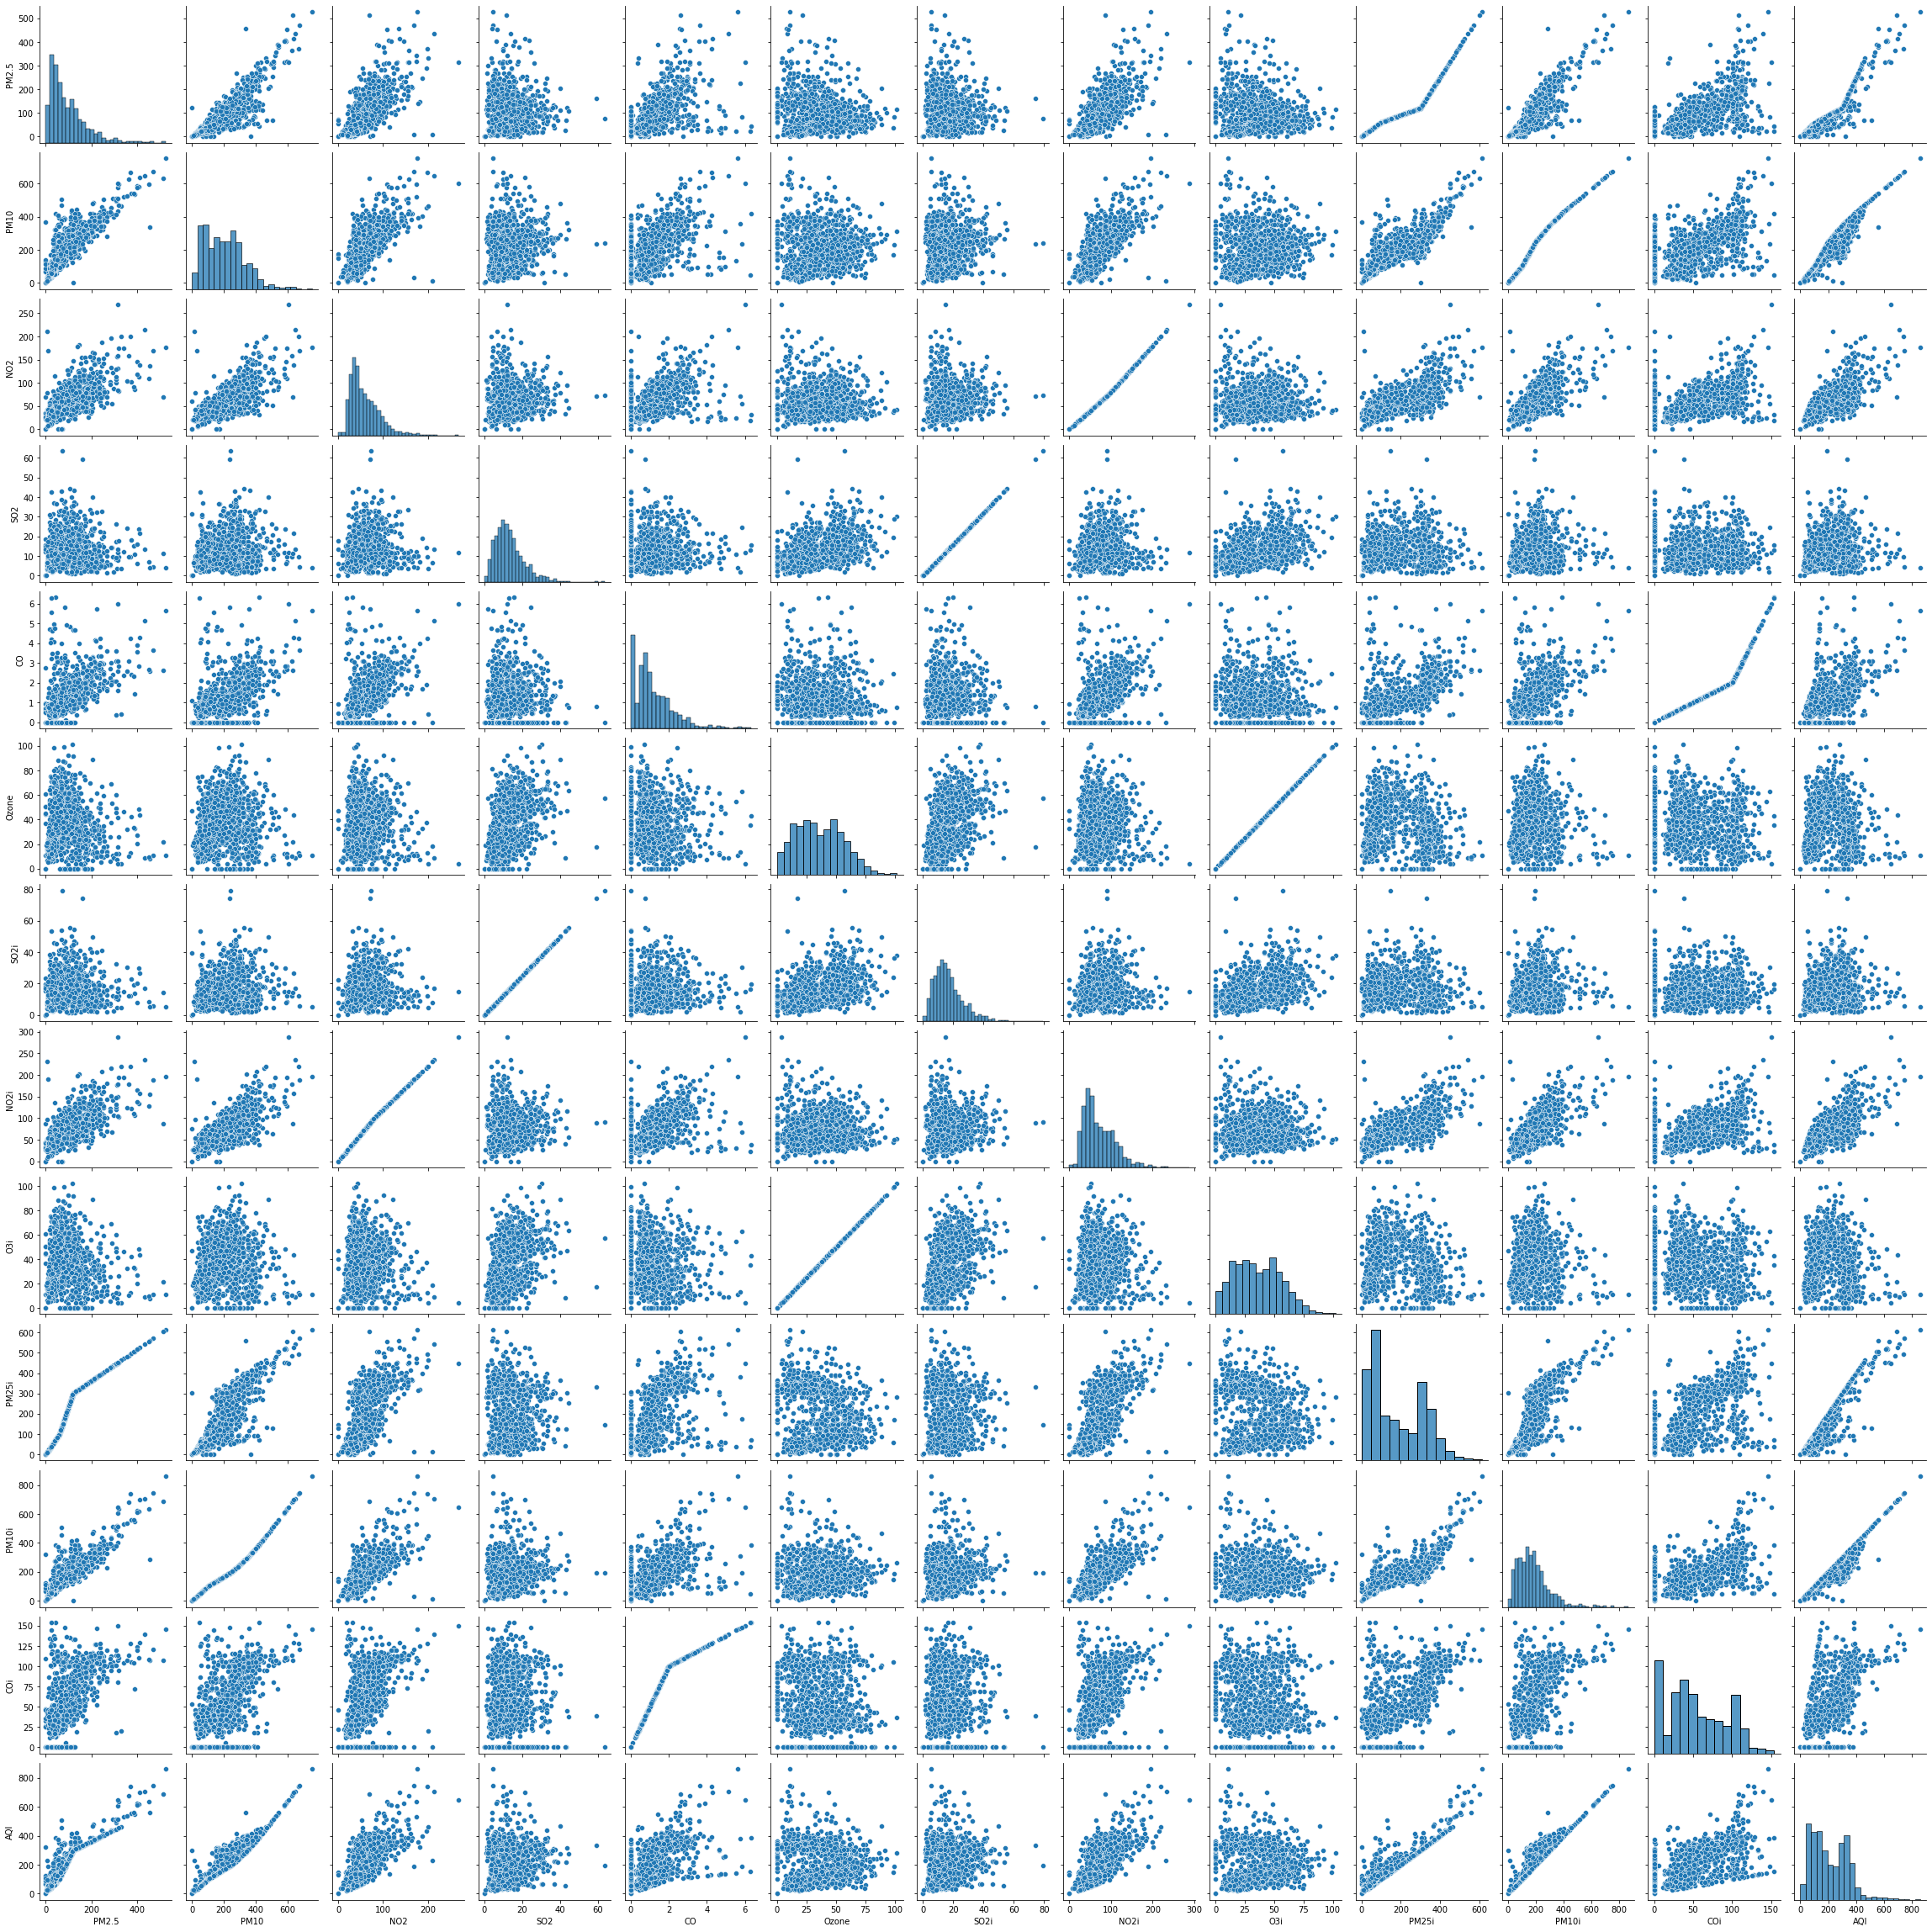

In [49]:
sns.pairplot(data=df)

[]

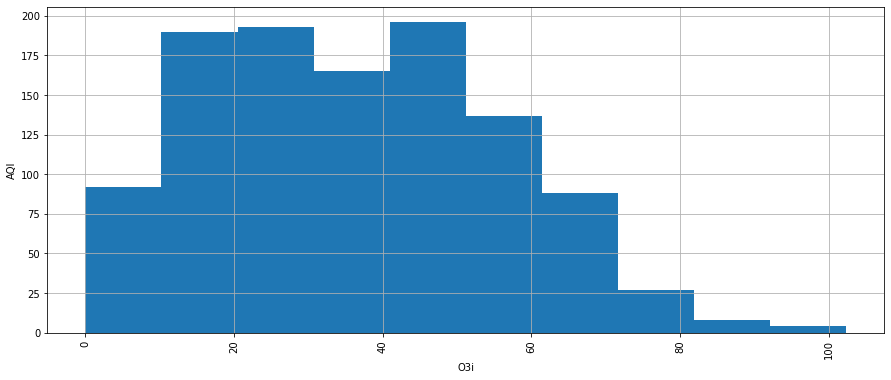

In [52]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.O3i.hist()
plt.xlabel('O3i')
plt.ylabel('AQI')
plt.plot()

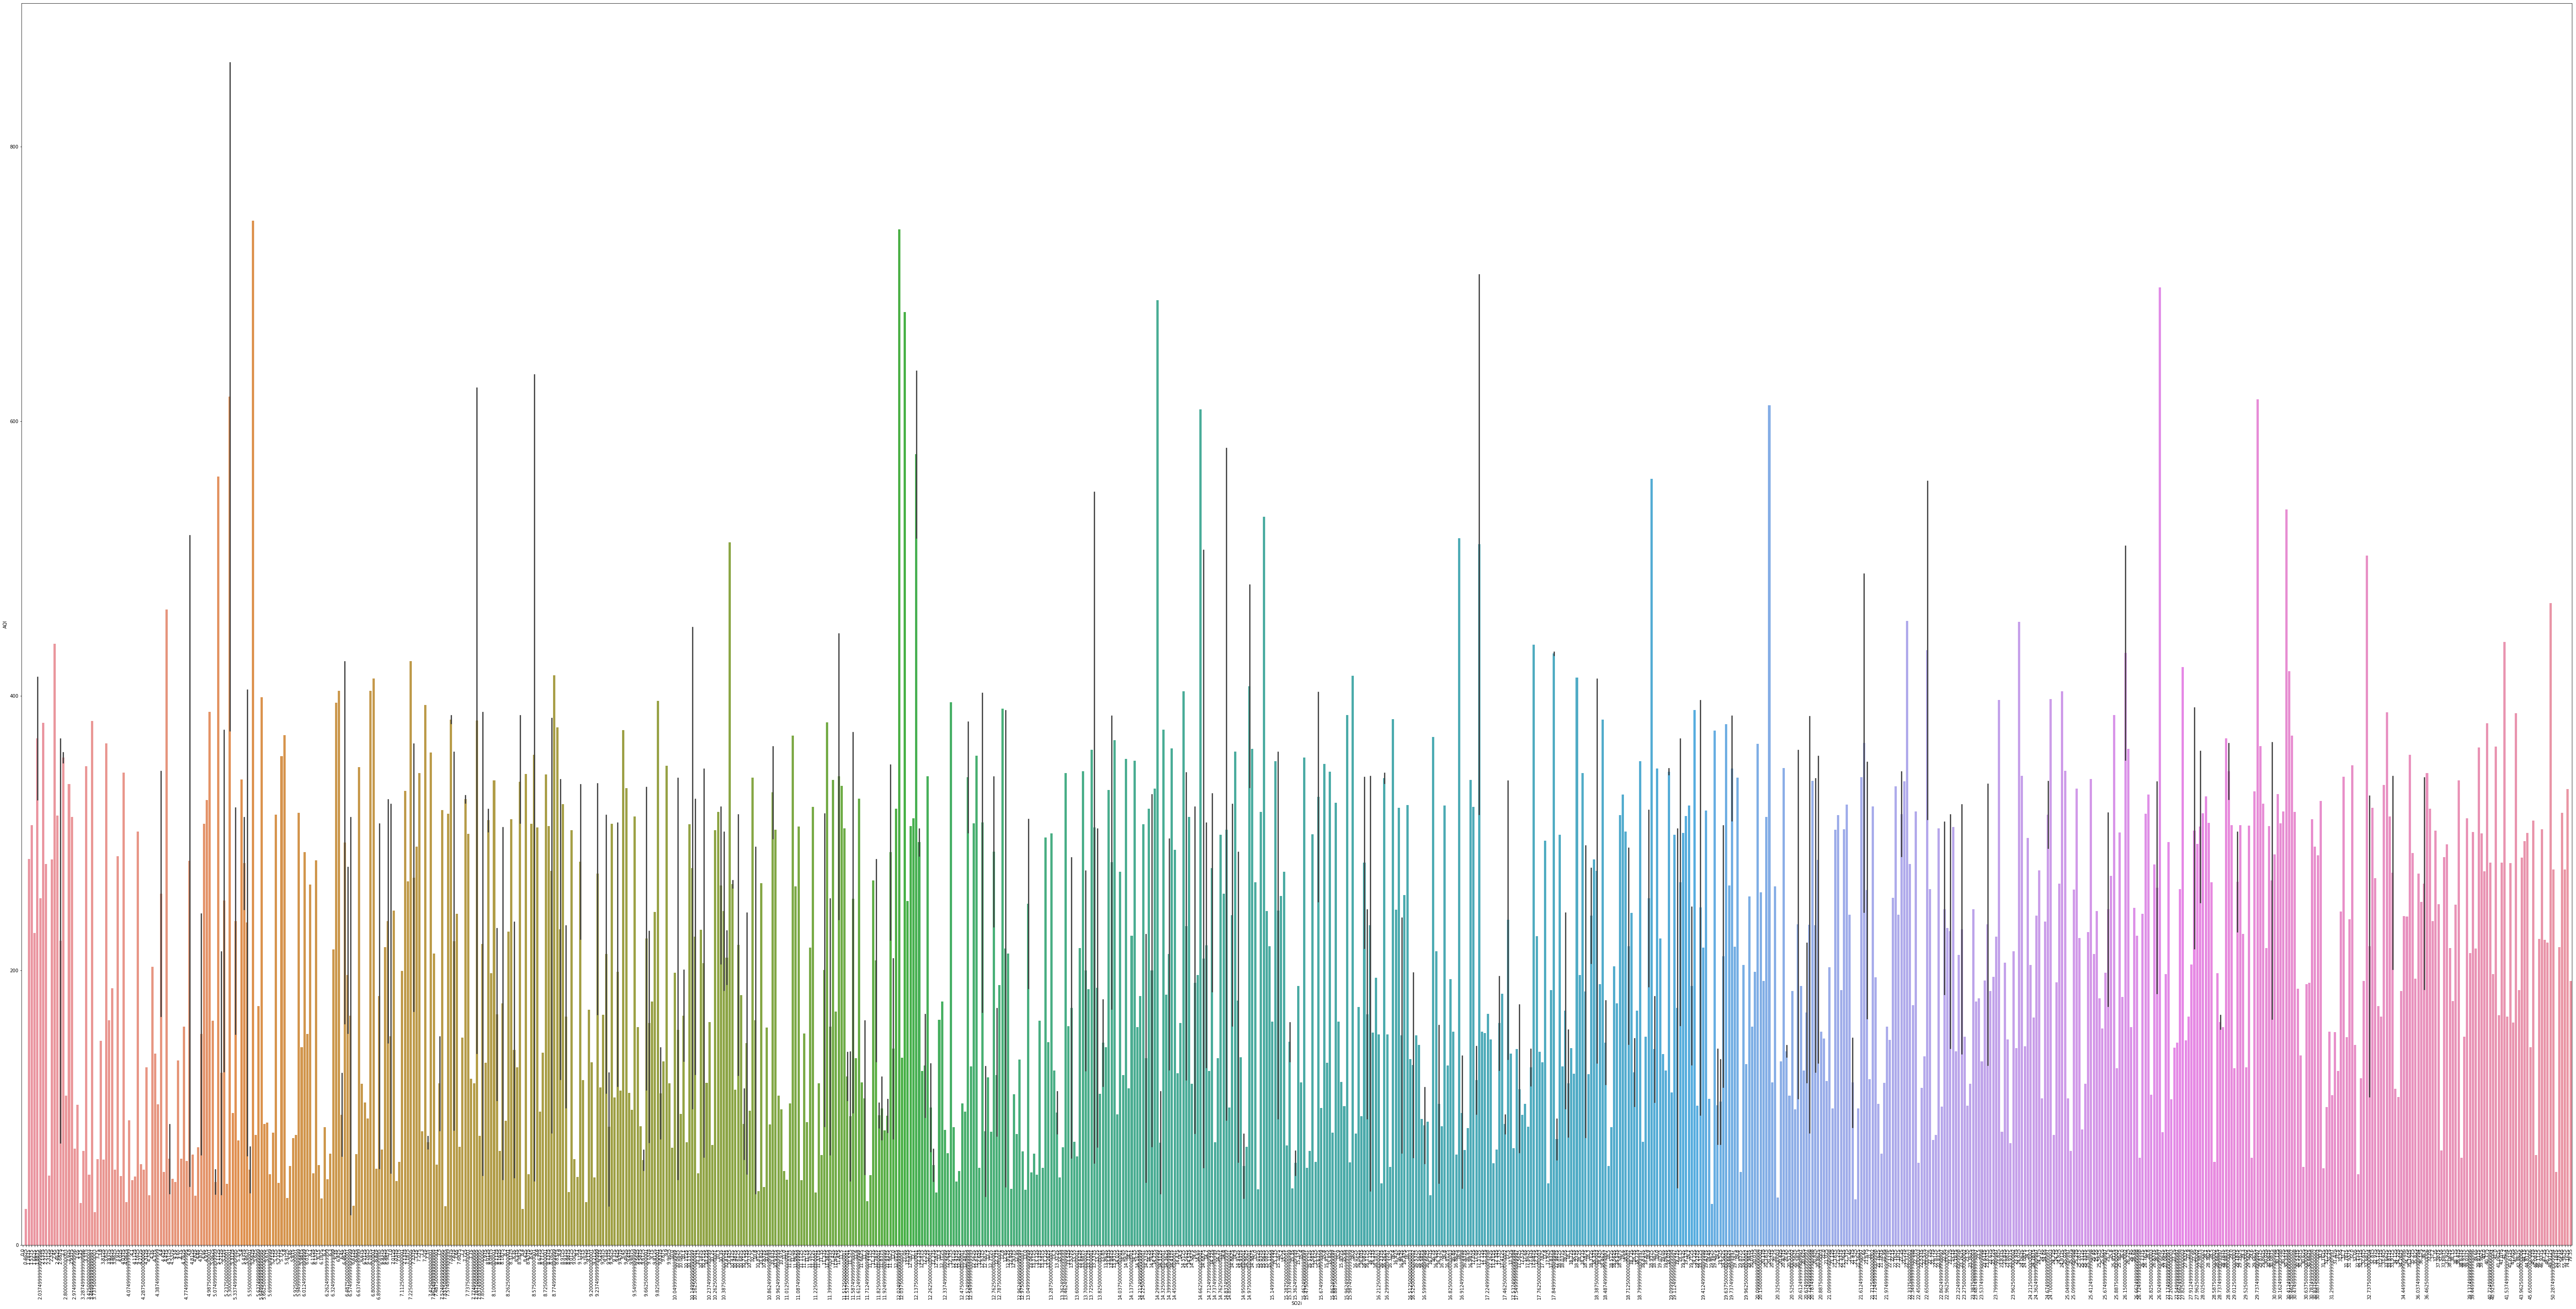

In [56]:
plt.figure(figsize=(100,50))
plt.xticks(rotation=90)
sns.barplot(x='SO2i',y='AQI',data=df);

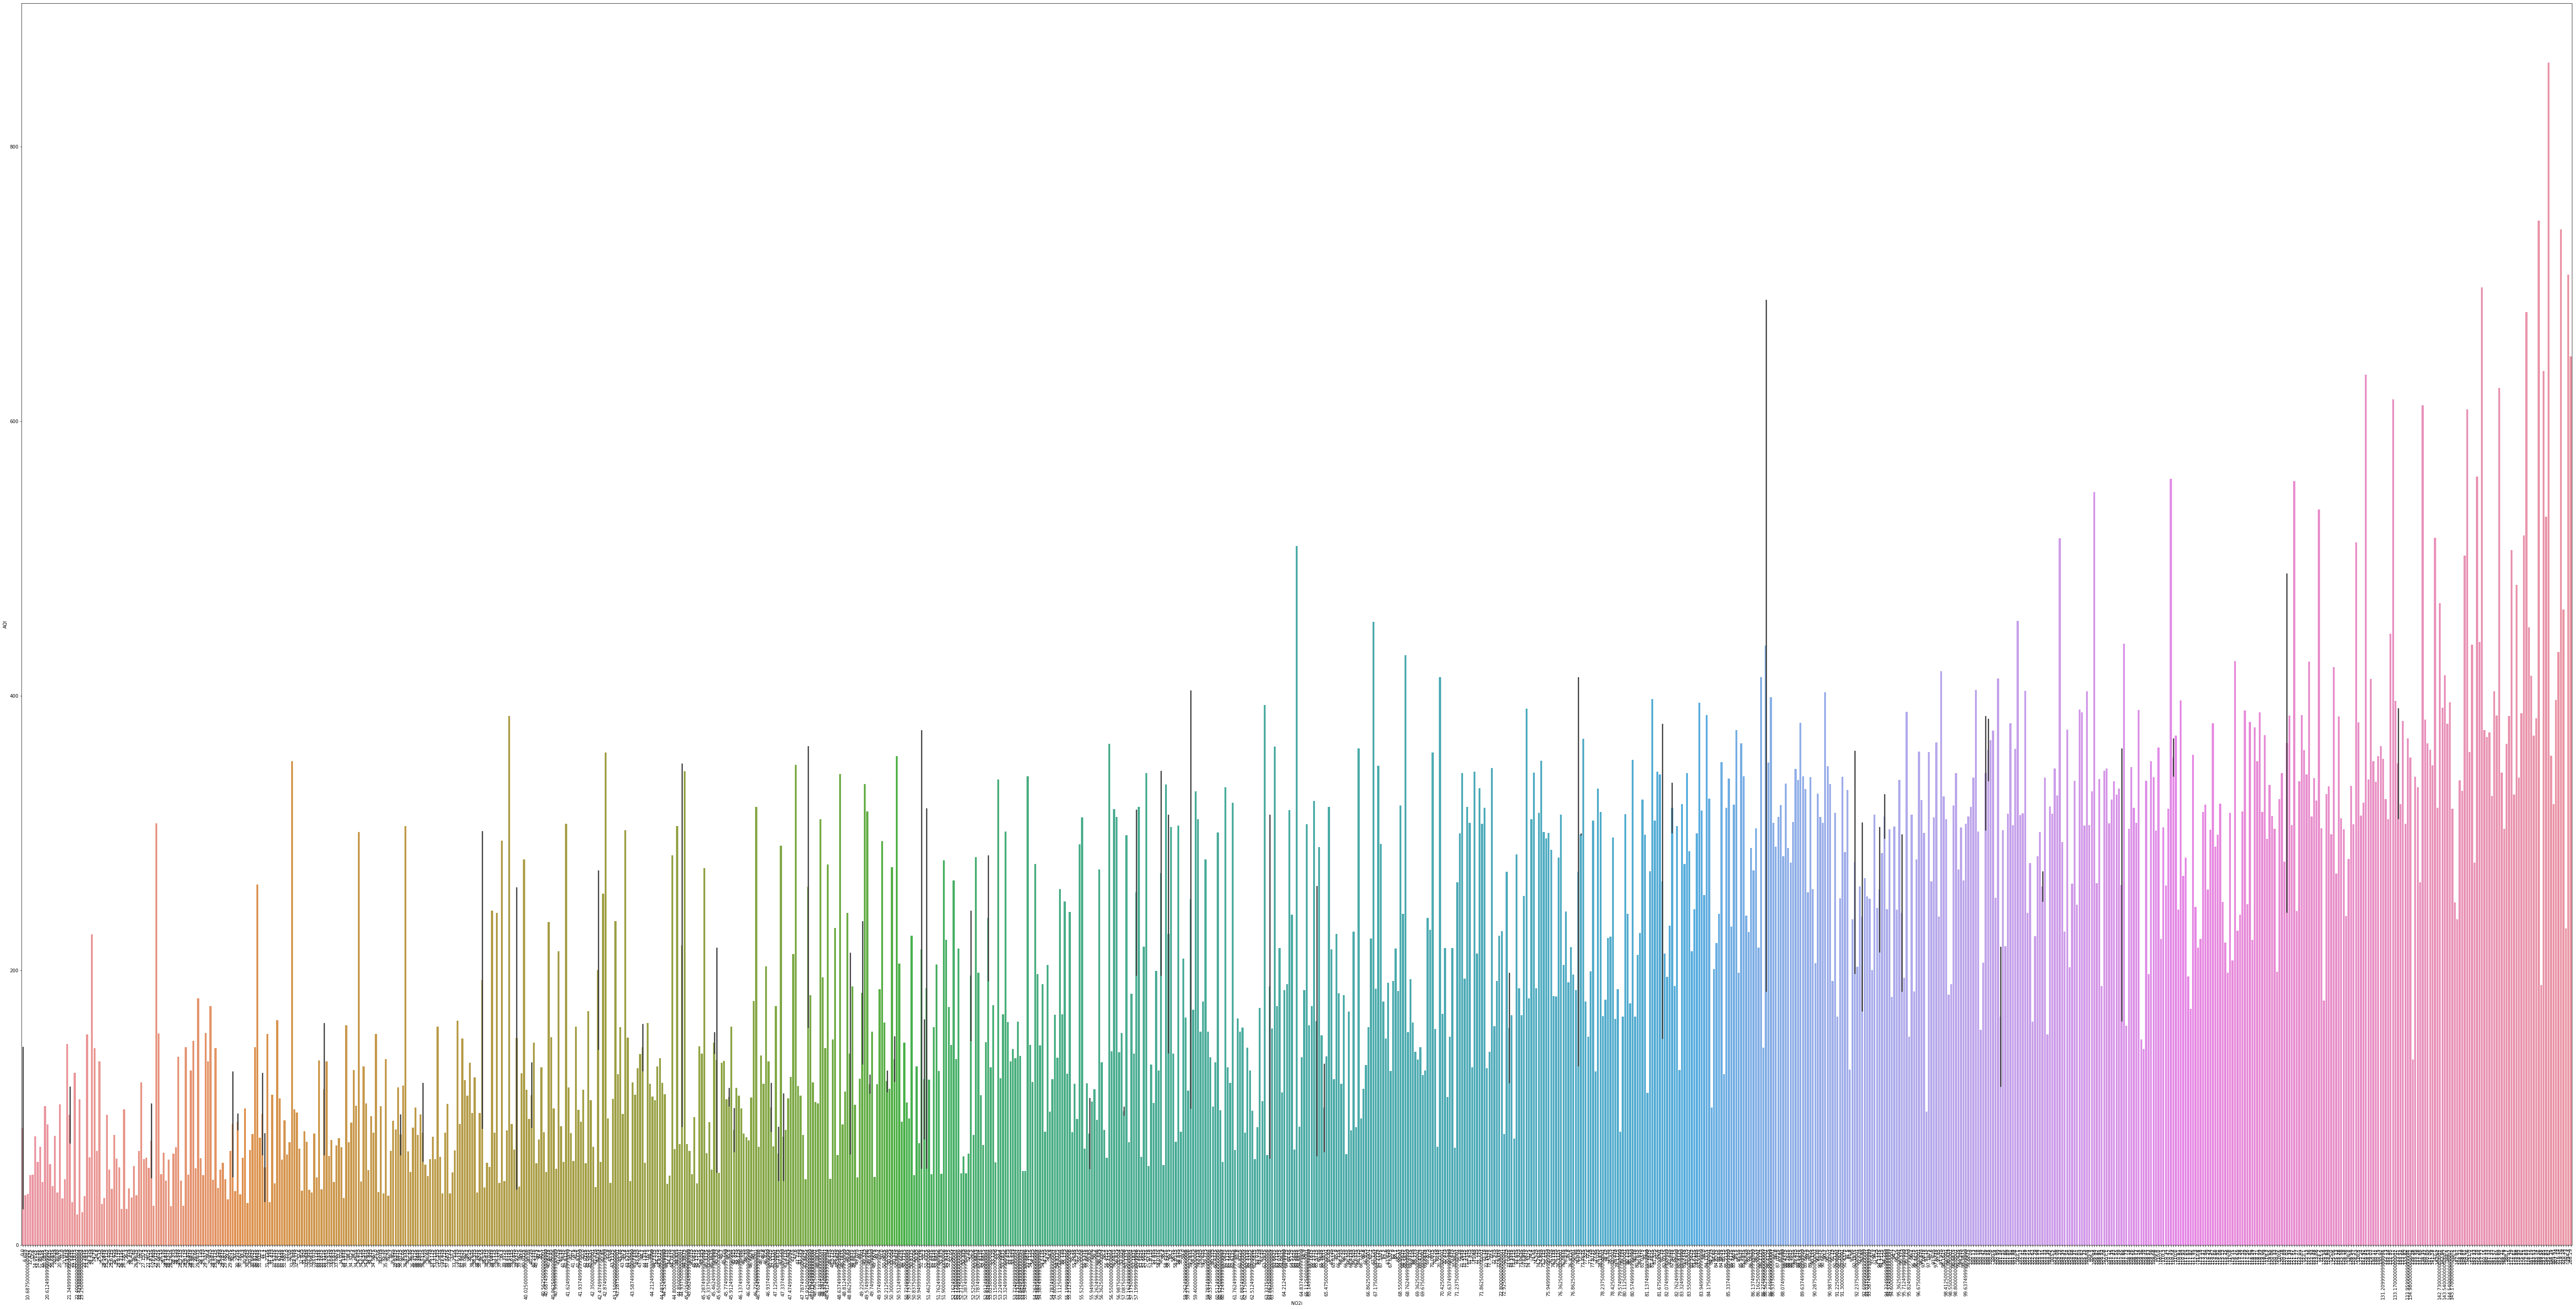

In [57]:
plt.figure(figsize=(100,50))
plt.xticks(rotation=90)
sns.barplot(x='NO2i',y='AQI',data=df);

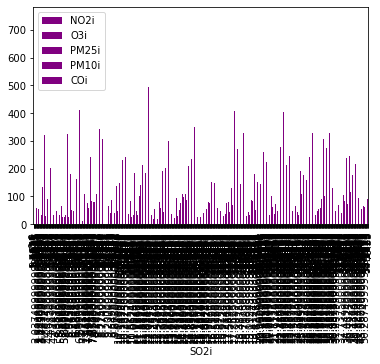

In [58]:
df[['SO2i','NO2i','O3i','PM25i','PM10i','COi']].groupby(["SO2i"]).mean().sort_values(by='SO2i').plot.bar(color='purple')
plt.show()